In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


Every Keras model is either built using the Sequential class, which represents a linear stack of layers, or the functional Model class, which is more customizeable. We’ll be using the simpler Sequential model, since our network is indeed a linear stack of layers.

The Sequential constructor takes an array of Keras Layers. Since we’re just building a standard feedforward network, we only need the Dense layer, which is your regular fully-connected (dense) network layer. A dense layer simply means that each neuron receives input from all the neurons in the previous layer.

Let’s throw in 3 Dense layers:

The first two layers have 6 nodes each and use the ReLU activation function. The last layer is a Softmax output layer with 1 nodes.

The last thing we always need to do is tell Keras what our network’s input will look like. We can do that by specifying an input_shape to the first layer in the Sequential model.Once the input shape is specified, Keras will automatically infer the shapes of inputs for later layers.

simply compile the model with our optimizer of choice, our loss function of choice, and the metrics we want to use to judge our model’s performance.

In [28]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\riteshp1\Anaconda3\envs\Tensor_Env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  """
C:\Users\riteshp1\Anaconda3\envs\Tensor_Env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
C:\Users\riteshp1\Anaconda3\envs\Tensor_Env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [29]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 50, nb_epoch = 100)


C:\Users\riteshp1\Anaconda3\envs\Tensor_Env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 0s 68us/step - loss: 0.5879 - accuracy: 0.7147 - val_loss: 0.5374 - val_accuracy: 0.7887
Epoch 2/100
5359/5359 [==============================] - 0s 44us/step - loss: 0.5213 - accuracy: 0.7959 - val_loss: 0.5069 - val_accuracy: 0.7967
Epoch 3/100
5359/5359 [==============================] - 0s 43us/step - loss: 0.4982 - accuracy: 0.7968 - val_loss: 0.4911 - val_accuracy: 0.7978
Epoch 4/100
5359/5359 [==============================] - 0s 44us/step - loss: 0.4840 - accuracy: 0.7966 - val_loss: 0.4808 - val_accuracy: 0.7982
Epoch 5/100
5359/5359 [==============================] - 0s 42us/step - loss: 0.4739 - accuracy: 0.7974 - val_loss: 0.4735 - val_accuracy: 0.7978
Epoch 6/100
5359/5359 [==============================] - 0s 42us/step - loss: 0.4658 - accuracy: 0.7974 - val_loss: 0.4675 - val_accuracy: 0.7974
Epoch 7/100
5359/5359 [==============================] - 0s 44us/step - loss

5359/5359 [==============================] - 0s 42us/step - loss: 0.3834 - accuracy: 0.8306 - val_loss: 0.4007 - val_accuracy: 0.8213
Epoch 57/100
5359/5359 [==============================] - 0s 40us/step - loss: 0.3815 - accuracy: 0.8315 - val_loss: 0.3987 - val_accuracy: 0.8220
Epoch 58/100
5359/5359 [==============================] - 0s 54us/step - loss: 0.3797 - accuracy: 0.8322 - val_loss: 0.3967 - val_accuracy: 0.8217
Epoch 59/100
5359/5359 [==============================] - 0s 59us/step - loss: 0.3779 - accuracy: 0.8345 - val_loss: 0.3952 - val_accuracy: 0.8247
Epoch 60/100
5359/5359 [==============================] - 0s 54us/step - loss: 0.3764 - accuracy: 0.8375 - val_loss: 0.3933 - val_accuracy: 0.8247
Epoch 61/100
5359/5359 [==============================] - 0s 44us/step - loss: 0.3746 - accuracy: 0.8384 - val_loss: 0.3913 - val_accuracy: 0.8270
Epoch 62/100
5359/5359 [==============================] - 0s 39us/step - loss: 0.3728 - accuracy: 0.8405 - val_loss: 0.3894 - val_a

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


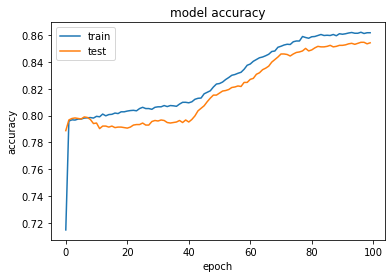

In [30]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


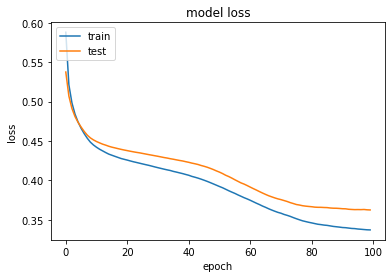

In [31]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [32]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1518   77]
 [ 205  200]]


In [35]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.859


# HyperParameter Tuning

In [64]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

def create_model(layers, activation,optimizer):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.1))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.1))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
            

In [58]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [59]:
layers = [(45, 30, 15),(10,6),(8,8)]
activations = ['sigmoid', 'relu']
optimzer= ['adam', 'rmsprop']
param_grid = dict(layers=layers, activation=activations,optimizer=optimzer, batch_size = [50,100,128, 256], epochs=[30,75,100,120])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)

grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_,grid_result.best_params_]

[0.8582499980926513,
 {'activation': 'relu',
  'batch_size': 50,
  'epochs': 30,
  'layers': (45, 30, 15),
  'optimizer': 'rmsprop'}]

In [65]:
ANN_classifier = Sequential()

# Adding the input layer and the first hidden layer
ANN_classifier.add(Dense(output_dim = 45, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
ANN_classifier.add(Dense(output_dim = 30, init = 'he_uniform',activation='relu'))
# Adding the output layer
ANN_classifier.add(Dense(output_dim = 15, init = 'he_uniform', activation = 'relu'))

ANN_classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))
# Compiling the ANN
ANN_classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


model_ANN=ANN_classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 50, nb_epoch = 30)

C:\Users\riteshp1\Anaconda3\envs\Tensor_Env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=45, kernel_initializer="he_uniform")`
  after removing the cwd from sys.path.
C:\Users\riteshp1\Anaconda3\envs\Tensor_Env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="he_uniform")`
  import sys
C:\Users\riteshp1\Anaconda3\envs\Tensor_Env\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=15, kernel_initializer="he_uniform")`
  if __name__ == '__main__':
C:\Users\riteshp1\Anaconda3\envs\Tensor_Env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  # This is added back by Interactive

Train on 5359 samples, validate on 2641 samples
Epoch 1/30
5359/5359 [==============================] - 0s 44us/step - loss: 0.4869 - accuracy: 0.7983 - val_loss: 0.4461 - val_accuracy: 0.8035
Epoch 2/30
5359/5359 [==============================] - 0s 27us/step - loss: 0.4317 - accuracy: 0.8100 - val_loss: 0.4267 - val_accuracy: 0.8148
Epoch 3/30
5359/5359 [==============================] - 0s 25us/step - loss: 0.4096 - accuracy: 0.8300 - val_loss: 0.4180 - val_accuracy: 0.8232
Epoch 4/30
5359/5359 [==============================] - 0s 29us/step - loss: 0.3930 - accuracy: 0.8380 - val_loss: 0.4057 - val_accuracy: 0.8277
Epoch 5/30
5359/5359 [==============================] - 0s 30us/step - loss: 0.3781 - accuracy: 0.8453 - val_loss: 0.3981 - val_accuracy: 0.8342
Epoch 6/30
5359/5359 [==============================] - 0s 23us/step - loss: 0.3628 - accuracy: 0.8509 - val_loss: 0.3898 - val_accuracy: 0.8326
Epoch 7/30
5359/5359 [==============================] - 0s 22us/step - loss: 0.350

1) val_loss starts increasing, val_acc starts decreasing. This means model is cramming values not learning

2) val_loss starts increasing, val_acc also increases.This could be case of overfitting or diverse probability values in cases where softmax is being used in output layer

3) val_loss starts decreasing, val_acc starts increasing. This is also fine as that means model built is learning and working fine.